# MMQ para dados climáticos

In [325]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sp

In [326]:
#importar dados
df = pd.read_excel('Data/final_data.xlsx')

In [327]:
def treinar_modelo(x_, y_):
    x_ = sm.add_constant(x_)
    model = sm.OLS(y_,x_)
    res = model.fit()
    return res   

In [328]:
def plotgrafico(xlabel, ylabel, label, linha):
    graf, eix = plt.subplots()
    eix.scatter(x,y, color = 'black')
    eix.plot(x, linha , label = label, color = 'red')
    eix.set_ylabel(ylabel)
    eix.set_xlabel(xlabel)
    eix.set_title('Grafico')
    eix.legend()
    graf.show()

In [329]:
#Previsão
array_prev = [2034.0410, 2034.1257, 2034.2049, 2034.2896, 2034.3716, 2034.4563, 2034.5383, 2034.6230, 2034.7077, 2034.7896, 2034.8743, 2034.9563]

## CO2xTempo

In [330]:
#definir variáveis x e y
y = np.array(df['Co2 ppm'])
x = np.array(df['decimal date'])



In [331]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.9412708282470703, pvalue=5.25531136560988e-17)

### Linear

In [332]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = y 
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.338e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:37   Log-Likelihood:                -2313.7
No. Observations:                 780   AIC:                             4631.
Df Residuals:                     778   BIC:                             4641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2907.5485     17.881   -162.606      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


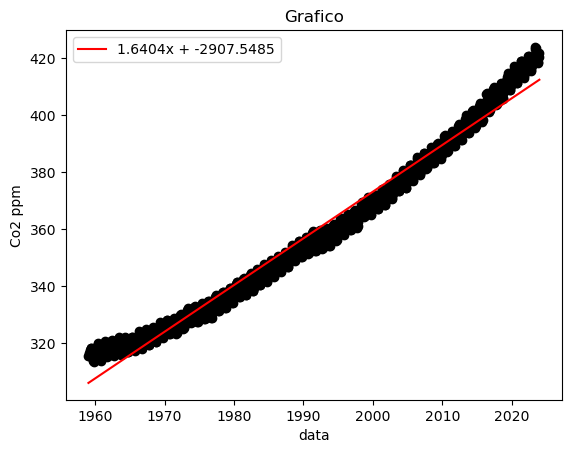

In [333]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Logarítmico

In [334]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.178e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:38   Log-Likelihood:                -2332.5
No. Observations:                 780   AIC:                             4669.
Df Residuals:                     778   BIC:                             4678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.444e+04    139.130   -175.675      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


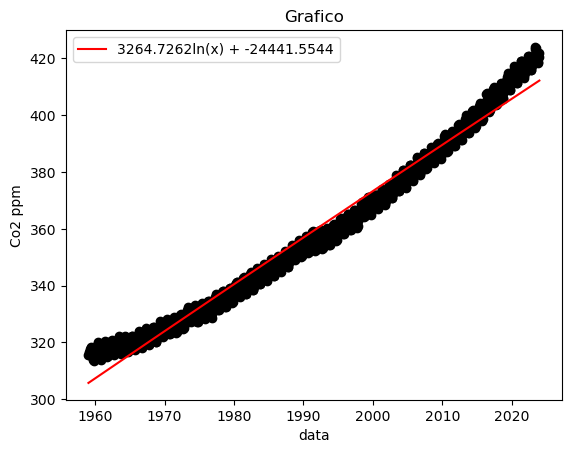

In [335]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Exponencial

In [336]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.286e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:38   Log-Likelihood:                 2459.6
No. Observations:                 780   AIC:                            -4915.
Df Residuals:                     778   BIC:                            -4906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1598      0.039    -80.357      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


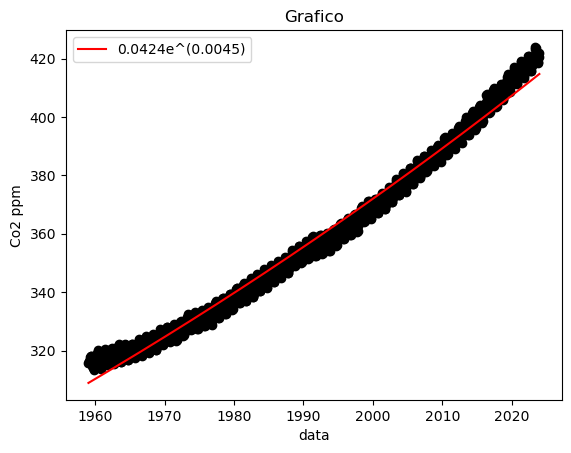

In [337]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

### Potencial

In [338]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.998e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:39   Log-Likelihood:                 2438.1
No. Observations:                 780   AIC:                            -4872.
Df Residuals:                     778   BIC:                            -4863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.7609      0.307   -204.416      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


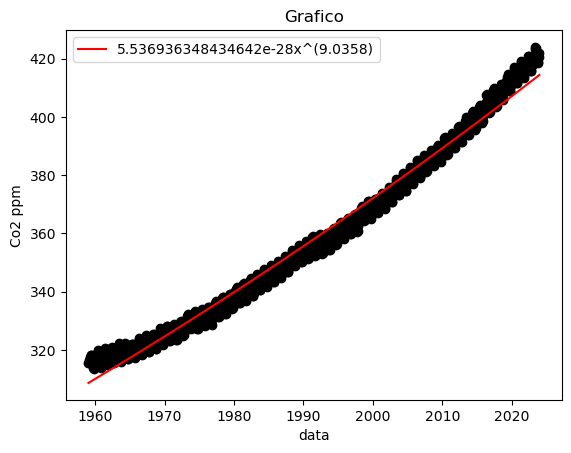

In [339]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0])}x^({round(res.params[1],4)})'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

### Polinomial

In [340]:
#Preparar model e treiná-lo, com teste t de student para significância
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.540e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:39   Log-Likelihood:                -1732.1
No. Observations:                 780   AIC:                             3470.
Df Residuals:                     777   BIC:                             3484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.918e+04   1007.098     48.835      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


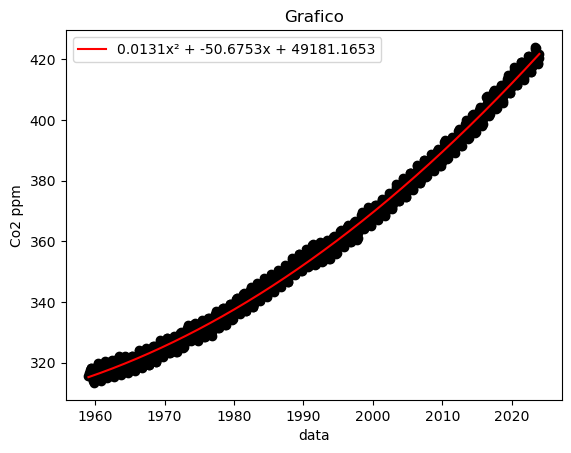

In [341]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

## Anomomalias de Temperatura x Tempo

In [342]:
#definir variáveis x e y
y = df['temperature anomalies'].values
x = df['decimal date'].values

In [343]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.9763274192810059, pvalue=6.321563272848607e-10)

### Linear

In [344]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     3751.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          7.68e-300
Time:                        17:16:39   Log-Likelihood:                 407.65
No. Observations:                 780   AIC:                            -811.3
Df Residuals:                     778   BIC:                            -802.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.0426      0.546    -60.522      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


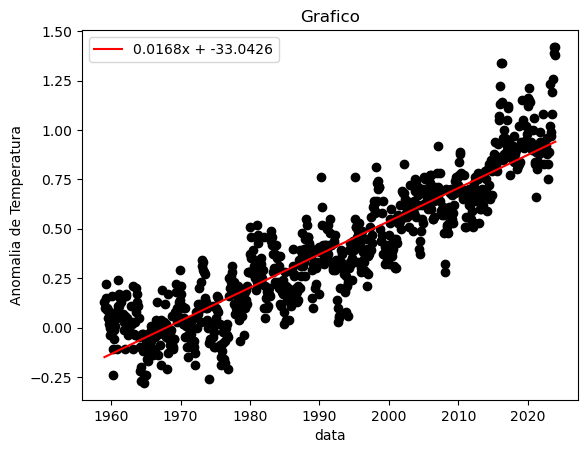

In [345]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

### Logarítmico

In [346]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3721.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          1.06e-298
Time:                        17:16:40   Log-Likelihood:                 405.02
No. Observations:                 780   AIC:                            -806.0
Df Residuals:                     778   BIC:                            -796.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -253.4261      4.161    -60.905      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


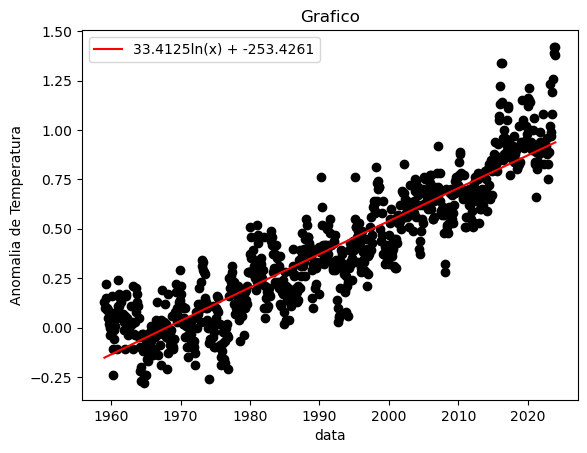

In [347]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

### Exponencial

In [348]:
#Normalização
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

y_ = np.log(y)
x_ = x

res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     3739.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          2.17e-299
Time:                        17:16:40   Log-Likelihood:                 808.92
No. Observations:                 780   AIC:                            -1614.
Df Residuals:                     778   BIC:                            -1605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4632      0.326    -59.632      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


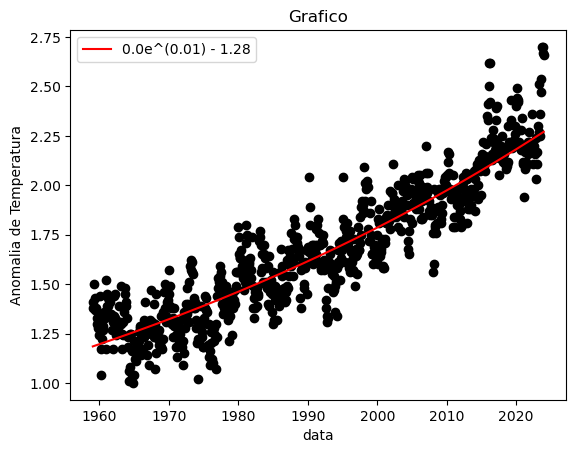

In [349]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)}) - {round(yNorm,4)}'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, funApro )

### Potencial

In [350]:
#Normalizar
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

x_ = np.log(x)
y_ = np.log(y)

res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3829.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          1.03e-302
Time:                        17:16:41   Log-Likelihood:                 1436.8
No. Observations:                 780   AIC:                            -2870.
Df Residuals:                     778   BIC:                            -2860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.2971      1.109    -60.710      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


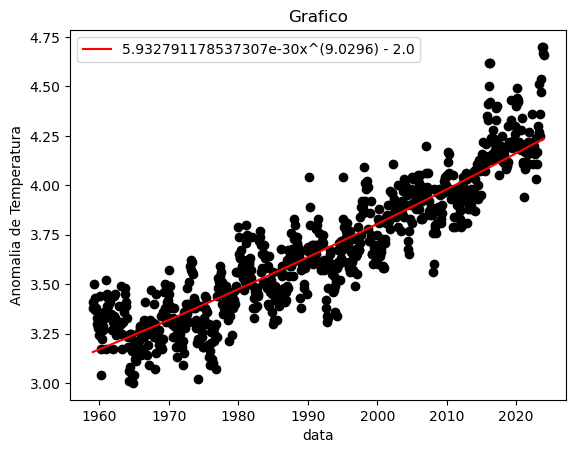

In [351]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0])}x^({round(res.params[1],4)}) - {round(yNorm,4)}'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, funApro  )

### Polinomial

In [352]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2212.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          1.71e-321
Time:                        17:16:41   Log-Likelihood:                 462.05
No. Observations:                 780   AIC:                            -918.1
Df Residuals:                     777   BIC:                            -904.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        622.1773     60.450     10.293      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


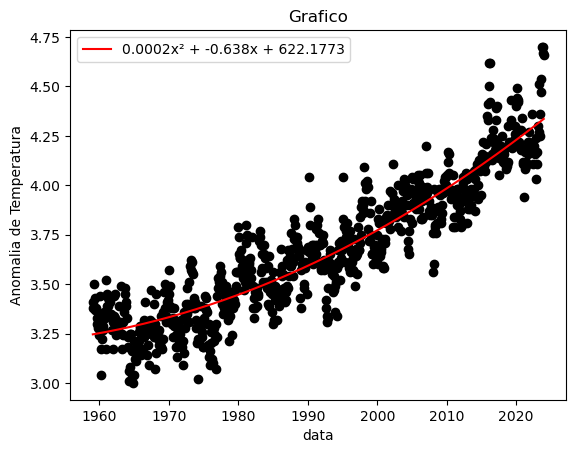

In [353]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

## Anomomalias de Temperatura x Co2

In [354]:
y = df['temperature anomalies']
x = df['Co2 ppm']

### Linear

In [355]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     4518.
Date:                   Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                           17:16:42   Log-Likelihood:                 468.65
No. Observations:                    780   AIC:                            -933.3
Df Residuals:                        778   BIC:                            -924.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2939 

/tmp/ipykernel_4876/3113635536.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})'
/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


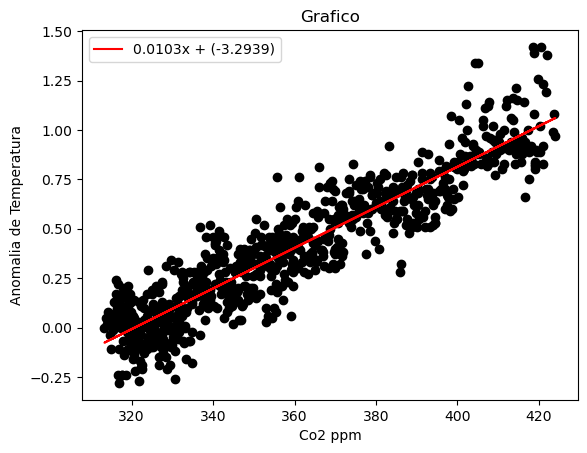

In [356]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

### Logarítmico

In [357]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                       0.851
Model:                               OLS   Adj. R-squared:                  0.851
Method:                    Least Squares   F-statistic:                     4434.
Date:                   Thu, 15 Aug 2024   Prob (F-statistic):          1.48e-323
Time:                           17:16:42   Log-Likelihood:                 462.37
No. Observations:                    780   AIC:                            -920.7
Df Residuals:                        778   BIC:                            -911.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.4879 

/tmp/ipykernel_4876/892153944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})'
/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


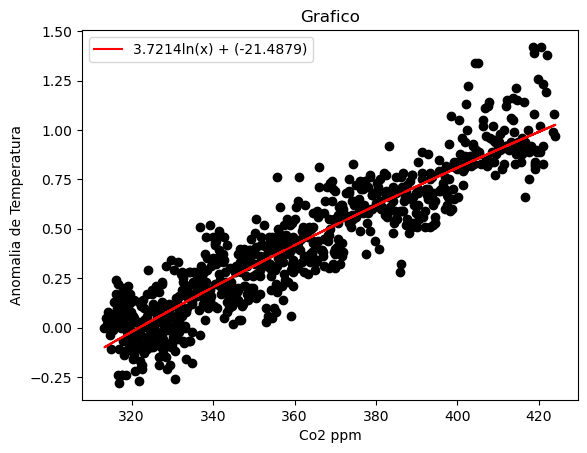

In [358]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

### Exponencial

In [359]:
#Normalização
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

y_ = np.log(y)
x_ = x

res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     3971.
Date:                   Thu, 15 Aug 2024   Prob (F-statistic):          7.83e-308
Time:                           17:16:43   Log-Likelihood:                 828.41
No. Observations:                    780   AIC:                            -1653.
Df Residuals:                        778   BIC:                            -1643.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6859 

/tmp/ipykernel_4876/2711745529.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)}) - {round(yNorm,4)}'
/tmp/ipykernel_4876/2711745529.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


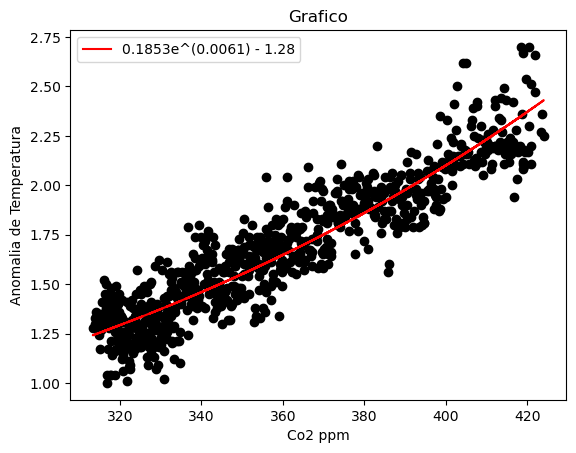

In [360]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)}) - {round(yNorm,4)}'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, funApro  )

### Potencial

In [361]:
#Normalizar
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

x_ = np.log(x)
y_ = np.log(y)

res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     4390.
Date:                   Thu, 15 Aug 2024   Prob (F-statistic):          4.05e-322
Time:                           17:16:43   Log-Likelihood:                 1481.5
No. Observations:                    780   AIC:                            -2959.
Df Residuals:                        778   BIC:                            -2950.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5977 

/tmp/ipykernel_4876/1134055906.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{np.exp(res.params[0])}x^({round(res.params[1],4)}) - {round(yNorm,4)}'
/tmp/ipykernel_4876/1134055906.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  funApro = np.exp(res.params[0]) * (x ** res.params[1])
/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


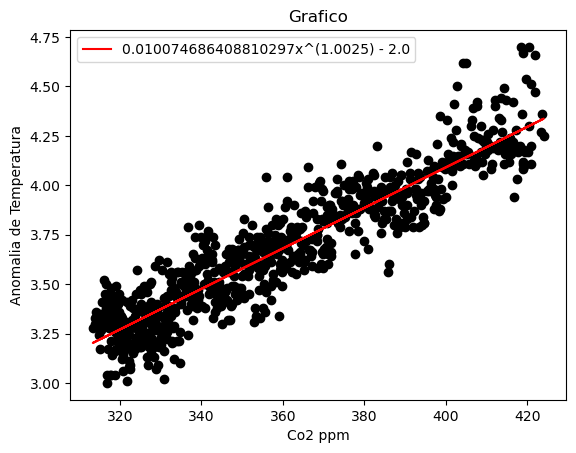

In [362]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0])}x^({round(res.params[1],4)}) - {round(yNorm,4)}'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, funApro  )

### Polinomial

In [363]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     2260.
Date:                   Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                           17:16:43   Log-Likelihood:                 469.27
No. Observations:                    780   AIC:                            -932.5
Df Residuals:                        777   BIC:                            -918.6
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7813 

/tmp/ipykernel_4876/557536971.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


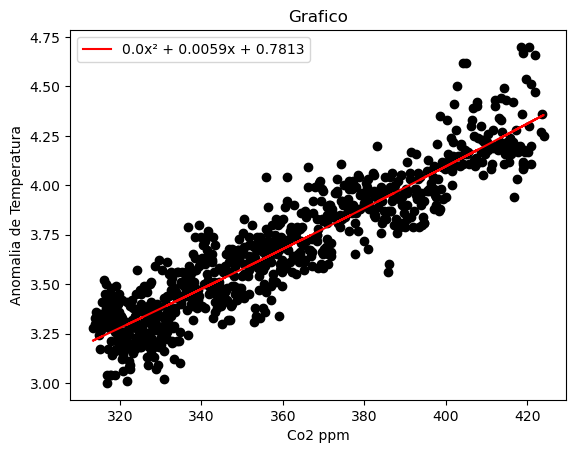

In [364]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )